# Model validation altimetry

Note: this notebook requires the model output data

In [1]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h
import mikeio.generic

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"
save_png = "sample" not in mr_fldr

In [3]:
if "sample" not in mr_fldr:
    from pathlib import Path
    if not Path(f"{mr_fldr}Area.dfsu").exists():
        # Concatenate the two files
        mikeio.generic.concat([f"{mr_fldr}Area_2014_2018.dfsu", f"{mr_fldr}Area_2019_2022.dfsu"], 
                            f"{mr_fldr}Area.dfsu", keep="first")

In [4]:
altlist = h.get_altimetry_obs(quality=None)

In [17]:
mr = ms.DfsuModelResult(mikeio.read(mr_fn)[0], name="MIKE21")
mr

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2022-12-31 23:00:00
Quantity: Surface Elevation [m]

In [18]:
cmps = []
match_t = slice("2017","2020") # You can choose a specific time period here
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time=match_t), mod=mr) 
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3b...
Processing c2...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing j2...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


Processing sa...


c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\mikeio\dataset\_dataset.py:254: UserWarning: The key Surface elevation does not match the item name (MIKE21) of the corresponding DataArray. Item name will be replaced with key.
  warnings.warn(


In [19]:
if len(cc)>0:
    cc.skill().round(4)
else:
    print("No data to show")

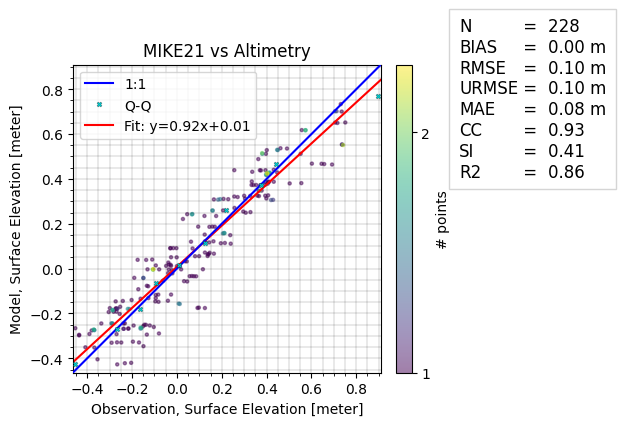

In [21]:
if len(cc)>0:
    cc.plot.scatter(skill_table=True, figsize=(5,4));
    plt.title("MIKE21 vs Altimetry")
    if save_png: plt.savefig("../figures/altimetry_comparison.png", bbox_inches="tight")
else:
    print("No data to show")


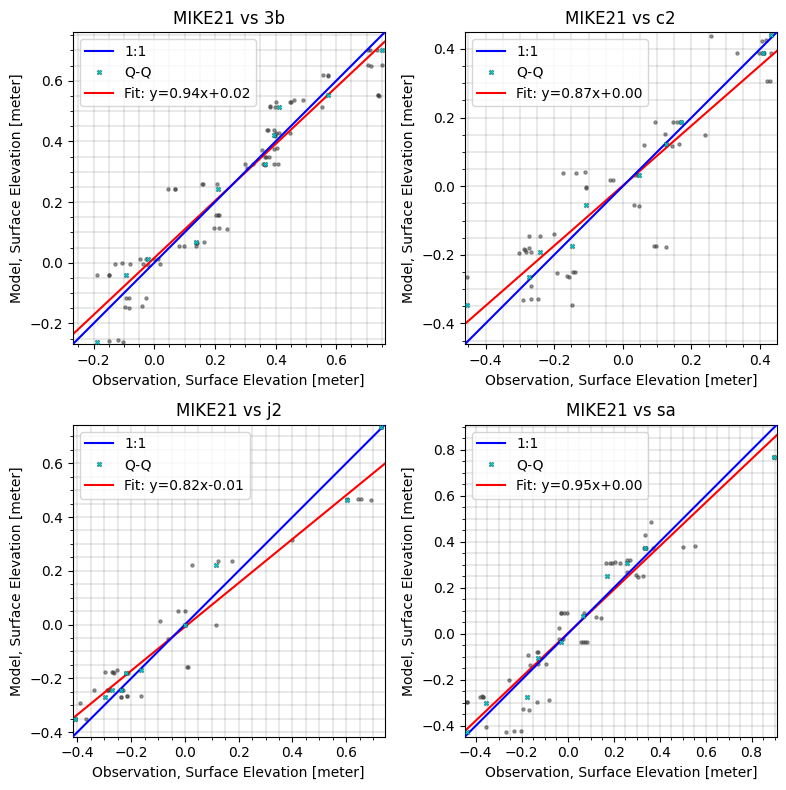

In [22]:
if len(cc)>0:
    fig, axs = plt.subplots(-(-len(cc)//2), 2, figsize=(8,len(cc)*2))
    axs = axs.flatten()
    for i in range(len(cc)):
        cc[i].sel().plot.scatter(ax=axs[i])

    if len(cc) % 2 != 0:
        axs[-1].axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("No data to show")
